## [160. Intersection of Two Linked Lists](https://leetcode.com/problems/intersection-of-two-linked-lists/)

问题难度: &clubs;

### 问题描述

写一个程序找到两个单向链表交叉的起点.

例如, 下面两个链表:

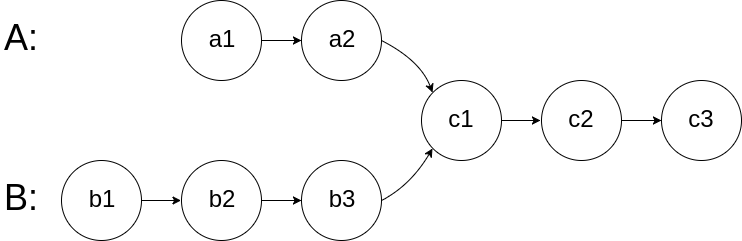

从节点`c1`开始交叉.

**示例1**
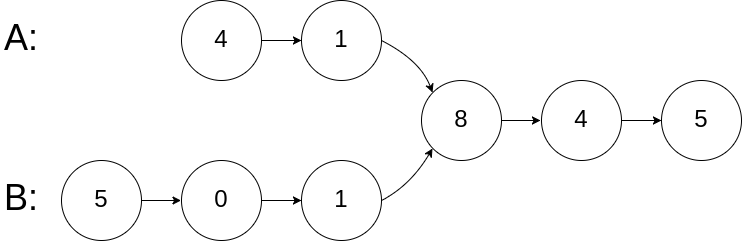

```
Input: intersectVal = 8, listA = [4,1,8,4,5], listB = [5,0,1,8,4,5], skipA = 2, skipB = 3
Output:value = 8的引用节点
输入解释: 交叉节点的值为 8 (注意:如果两个链表相交的话这个值肯定不为0). 从 A 的起始节点到末尾节点为 [4,1,8,4,5]. 从B的起始节点到末尾节点为 [5,0,1,8,4,5]. 在交叉节点之前 A 有2个节点, B 有3个节点.
```

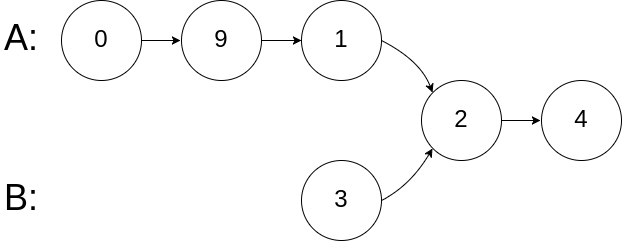

```
Input: intersectVal = 2, listA = [0,9,1,2,4], listB = [3,2,4], skipA = 3, skipB = 1
Output: value = 2的引用节点
输入解释: 交叉节点的值为 2 (注意:如果两个链表相交的话这个值肯定不为0). 从 A 的起始节点到末尾节点为 [0,9,1,2,4]. 从B的起始节点到末尾节点为 [3,2,4]. 在交叉节点之前 A 有3个节点, B 有1个节点.
```

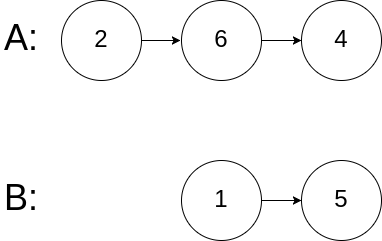
```
Input: intersectVal = 0, listA = [2,6,4], listB = [1,5], skipA = 3, skipB = 2
Output: null
输入解释: 从 A 的起始节点到末尾节点为 [2,6,4]. 从 B 的起始节点到末尾节点为 [1,5]. 由于两个链表不交叉,交叉的值必须为`0`, 而skipA和skipB可以是任意值.
解释: 两个链表不交叉, 因此返回null.
```

**注意**

- 如果两个链表不交叉,返回`null`
- 在函数返回之后必须维持链表的原始结构
- 可以假设整个链表结构无环
- 尽量使用`O(n)`的时间复杂度和`O(1)`的空间复杂度

### 解题思路

如果两个链表交叉的话, 很明显会是一个`Y`字形. 如果有交叉的话, 后面必定会有几个交叉的节点. 需要遍历两遍:

- 第一遍: 计算出链表的长度差
- 第二遍: 先将长链表的指针往前移动相应的长度差, 然后两个一起向前遍历, 如果遇到相同的节点, 那么直接返回; 否则到最后直接返回`null`

此时, 时间复杂度为`O(n)`, 空间复杂度为`O(1)`, 满足给定的条件.

### 代码

In [1]:
# Definition for singly-linked list.
#class ListNode(object):
#    def __init__(self, x):
#        self.val = x
#        self.next = None

class Solution(object):
    def getIntersectionNode(self, headA, headB):
        """
        :type head1, head1: ListNode
        :rtype: ListNode
        """
        a_tail, b_tail = headA, headB
        a_len, b_len = 0, 0
        while a_tail is not None:
            a_len += 1
            a_tail = a_tail.next
        while b_tail is not None:
            b_len += 1
            b_tail = b_tail.next
        a_tail, b_tail = headA, headB
        # 如果长度不相等, 那么就移动到长度相等的情况下再开始比较
        if a_len > b_len:
            num = a_len - b_len
            while num > 0:
                num -= 1
                a_tail = a_tail.next
        elif a_len < b_len:
            num = b_len - a_len
            while num > 0:
                num -= 1
                b_tail = b_tail.next
        while a_tail is not None:
            if a_tail == b_tail:
                return a_tail
            a_tail = a_tail.next
            b_tail = b_tail.next
        return None

## [161. One Edit Distance](https://leetcode.com/problems/one-edit-distance/)

问题难度: &clubs;&clubs;&clubs;

### 问题描述

给定两个字符串`S`和`T`, 判断它们之间的编辑距离是否为`1`.

### 解题思路

回顾一下**编辑距离**, 将给定字符串转化为目标字符串需要操作的最小次数. 其中操作包括: 1. 插入一个字符, 2. 删除一个字符, 3.替换一个字符.

一般使用动态规划法进行求解, 分为以下几种情况:
- 如果`S[m] == T[n]`, 那么不需要进行任何操作: `edit[m][n] = edit[m-1][n-1]`
- 如果`S[m] != T[n]`, 那么可能需要进行以下几种操作:
    - 对`S`或者`T`的最后一个元素进行修改, `edit[m][n] = edit[m-1][n-] + 1`
    - 删除`S`的最后一个元素, `edit[m][n] = edit[m-1][n] + 1`
    - 删除`T`的最后一个元素, `edit[m][n] = edit[m][n-1] + 1`
    - 增加`S`的最后一个元素, `edit[m][n] = edit[m-1][n] + 1`
    - 增加`T`的最后一个元素, `edit[m][n] = edit[m][n-1] + 1`
- 比较特殊的情况是: 当 `m==0`时, `edit[0][n]=n`; 当`n==0`时, `edit[m][0]=m`

总结一下, 递归公式如下:

`edit[m][n]=`
- `m , n == 0`
- `n , m == 0`
- `min(edit[m-1][n-1] + flag, edit[m-1][n] + 1, edit[m][n-1] + 1)

其中, `flag = 0 if S[m] == T[n] else 0`

好的, 回到这道题目. 判断两个字符串之间的编辑距离是否为`1`, 其实可以直接先按照长度来判断:

- 如果长度相差超过`1`, 那么直接返回`False`
- 如果长度相差等于`1`, 那么长的字符串去掉`1`个字符必定会与短的字符串相等
- 如果长度相差等于`0`, 那么必定只有一个字符不一样

这样就比较好写代码了.

### 代码

In [8]:
class Solution(object):
    def isOneEditDistance(self, s, t):
        """
        :type s, t: str
        :rtype: boolean
        """
        len_diff = len(s) - len(t)
        if len_diff > 1 or len_diff < -1:
            return False
        if len_diff == 0:
            # 如果长度差为0, 那么必定只有1个字符不一样
            diff = 0
            for i in range(len(s)):
                if s[i] != t[i]:
                    diff += 1
                    if diff > 1:
                        return False
            if diff == 1:
                return True
            else:
                return False
        # 如果长度差为1, 需要增加一个字符
        if len_diff < 0:
            s, t = t, s
        for i in range(len(t)):
            if s[i] != t[i]:
                return s[i+1:] == t[i:]
        return True

In [10]:
sl = Solution()

s = "aaa"
t = "aba"
print(sl.isOneEditDistance(s, t))


s = "aaa"
t = "ab"
print(sl.isOneEditDistance(s, t))

True
False


## [162. Find Peak Element](https://leetcode.com/problems/find-peak-element/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

峰顶元素指的是大于其邻居元素的元素. 给定一个输入数组`nums`(`nums[i] != nums[i+]`), 找到一个峰顶元素并且返回其索引. 数组可能包含多个峰顶, 这种情况下, 返回任意索引都可以, 可以假设: `nums[-1] = nums[n]`, 为负无穷.

**示例1**
```
Input: nums = [1,2,3,1]
Output: 2
解释: 3为顶峰元素, 函数应该好返回下标 2.
```

**示例2**
```
Input: nums = [1,2,1,3,5,6,4]
Output: 1 or 5 
解释: 函数可以返回 1 (对应的峰顶元素为2), 或者返回 5 (对应的峰顶元素为6)
```

### 解题思路

直观的想法: 从前往后遍历, 判断后面的值与当前值的大小比较:

- 如果当前值大于后面的值, 那么直接返回当前下标
- 如果当前值小于后面的值, 那么指针向前挪动一步

### 代码

In [13]:
class Solution(object):
    def findPeakElement(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        i = 0
        while i < len(nums)-1:
            if nums[i] > nums[i+1]:
                return i
            i += 1
        return i

In [14]:
s = Solution()
nums = [1,2,3,1]
print(s.findPeakElement(nums))

nums = [1,2,1,3,5,6,4]
print(s.findPeakElement(nums))

nums = [2,2,2,2]
print(s.findPeakElement(nums))

2
1
3


## [163. Missing Ranges](https://leetcode.com/problems/missing-ranges)

问题难度; &clubs; &clubs; &clubs;

### 问题描述

给定一个排好序的整数数组, 其中元素的范围在`[0,99]`之间, 返回其缺失的范围. 例如给定`[0,1,3,50,75]`,返回`["2", "4->49", "51->74", "76-99"]`.

### 解题思路

使用一个额外变量`last_val`记录前面的最后一个值(初始设置为`-1`), 从前往后遍历数组:

- 如果`nums[i] - last_val != 1`, 记录一个缺失范围: `[last_val + 1, nums[i] - 1]`, 特别注意: 当`last_val + 1 == nums[i] - 1`时, 就直接填写单个值就好了
- `last_val = nums[i]`

最后再判断一下数组最后一个数字与`99`的差值即可.


### 代码

In [18]:
class Solution(object):
    def findMissingRanges(self, nums, lower, upper):
        """
        :type nums: List[int]
        :type lower: int
        :type upper: int
        :rtype: List[str]
        """
        def getRange(start, end):
            if start == end:
                return str(start)
            else:
                return str(start) + "->" + str(end)
        if len(nums) == 0:
            return [getRange(lower, upper)]
        missing_ranges = []
        last_val = lower - 1
        for i in range(len(nums)):
            if nums[i] - last_val != 1:
                missing_ranges.append(getRange(last_val + 1, nums[i] - 1))
            last_val = nums[i]
        if nums[-1] < upper:
            missing_ranges.append(getRange(nums[-1]+1, upper))
        return missing_ranges

In [20]:
s = Solution()
nums = [0,1,3,50,75]
upper = 0
lower = 99
print (s.findMissingRanges(nums, upper, lower))


nums = [1,3,50,75]
upper = 0
lower = 99
print (s.findMissingRanges(nums, upper, lower))

['2', '4->49', '51->74', '76->99']
['0', '2', '4->49', '51->74', '76->99']


## [164. Maximum Gap](https://leetcode.com/problems/maximum-gap/)

问题难度: &clubs; &clubs; &clubs; &clubs; &clubs;

### 问题描述

给定一个未排序的数组, 找到排序形式下连续元素之间的最大差值. 如果数组元素数少于`2`, 直接返回`0`.

**示例1**
```
Input: [3,6,9,1]
Output: 3
解释:  排序的数组形式是 [1,3,6,9], (3,6) 或者 (6,9) 都有最大的差值 3.
```

**示例2**
```
Input: [10]
Output: 0
解释: 数组中的元素个数少于 2, 因此, 返回 0.
```
**注意**:
- 可以假设 数组中的所有元素都是非负的整数,并且在`32`位有符号的整数范围内
- 尝试在线性时间/空间范围内解决这个问题

### 解题思路

一般最简单的思想就是对数组进行排序, 要求在线性时间内解决这个问题, 考虑使用桶排序.

第一步: 获取到数的范围, `max`和`min`

第二步: 计算每个桶的容量: `size = (max-min)/n + 1`

第三步: 确定桶的数目: `num = (max-min)/size + 1`

第四步: 找到每个桶的最大值和最小值

最大差值必定是上一个桶的最大值和下一个桶的最小值之间的差值, 为什么呢? 因为我们可以看看每个桶的容量计算方式: `size = (max-min)/n + 1` 也就是说容量为平均距离, 要求最大的距离必然不会落在同一个桶内.

### 代码

In [37]:
class Solution(object):
    def maximumGap(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        if len(nums) == 0:
            return 0
        INT_MAX = 2147483647
        INT_MIN = -2147483648
        num_max = INT_MIN
        num_min = INT_MAX
        n = len(nums)
        # 获取数的范围
        for num in nums:
            num_max = num if num > num_max else num_max
            num_min = num if num < num_min else num_min
        # 计算每个桶的容量
        size = (num_max - num_min) // n + 1
        # 计算桶的数目
        bucket_num = (num_max - num_min) // size + 1
        bucket_max = [INT_MIN for _ in range(bucket_num)]
        bucket_min = [INT_MAX for _ in range(bucket_num)]
        bucket_dict = dict()
        # 计算每个桶的上下限
        for num in nums:
            idx = (num - num_min) // size
            bucket_max[idx] = num if num > bucket_max[idx] else bucket_max[idx]
            bucket_min[idx] = num if num < bucket_min[idx] else bucket_min[idx]
            bucket_dict[idx] = 1
        # 计算最大值
        res = 0
        pre = 0
        for i in range(1, bucket_num):
            if i in bucket_dict:
                now_gap = bucket_min[i] - bucket_max[pre]
                res = now_gap if now_gap > res else res
                pre = i
        return res     

In [38]:
s = Solution()
nums = [3,6,9,1]
print(s.maximumGap(nums))
nums = [1,3,100]
print(s.maximumGap(nums))

3
97


## [165. Compare Version Numbers](https://leetcode.com/problems/compare-version-numbers/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

比较两个版本数`version1`和`version2`的大小.

如果`version1 > version2`,返回`1`; 如果`version1 < version2`, 返回`-1`, 否则返回`0`.

可以假设版本字符串都非空并且只包含数字和`.`字符. `.`不表示数学意义上的小数点, 只是用来分割数字序列. 例如, `2.5`不是表示`2+0.5`也不是表示版本`3`的一半, 而是第`2`个首级别的第`5`个次级别版本.

可以假设每层的默认版本均为`0`.例如,版本号`3.4`有`3`和`4`作为第一级别和第二级别的版本号. 它的第三和第四级别版本号都是`0`.

**示例1**
```
Input: version1 = "0.1", version2 = "1.1"
Output: -1
```

**示例2**
```
Input: version1 = "1.0.1", version2 = "1"
Output: 1
```

**示例3**
```
Input: version1 = "7.5.2.4", version2 = "7.5.3"
Output: -1
```

**示例4**
```
Input: version1 = "1.01", version2 = "1.001"
Output: 0
解释: 忽略前面的0, “01”和 “001" 都表示数字 “1”
```

**示例5**
```
Input: version1 = "1.0", version2 = "1.0.0"
Output: 0
解释: 第一个版本字符串没有第三级别的版本号, 这就意味着它的第三级别版本号默认为 "0"
```

**注意**:

- 版本字符串只包含数字,并且通过点`.`进行分割, 数值字符串前面**可能**包含`0`
- 版本字符串不会以点开头或者结尾, 并且不会出现两个连续的点

### 解题思路

两个字符串同时从前向后遍历, 使用两个变量分别记录当前的值, 遇到`.`则停止, 然后进行比较; 如果相等,则继续往前遍历, 否则直接返回当前的比较结果. 如果其中一方已经遍历到末尾, 那么直接将该方的变量值设置为`0`.


### 代码

In [20]:
class Solution(object):
    def compareVersion(self, version1, version2):
        """
        :type version1: str
        :type version2: str
        :rtype: int
        """
        index_1, index_2, len_1, len_2 = 0, 0, len(version1), len(version2)
        while  index_1 < len_1 or index_2 < len_2:
            cur_val_1, cur_val_2 = 0, 0
            while index_1 < len_1 and version1[index_1] != ".":
                cur_num = int(version1[index_1])
                if cur_val_1 > 0 or cur_num > 0:
                    cur_val_1 = cur_val_1 * 10 + cur_num
                index_1 += 1
            while index_2 < len_2 and version2[index_2] != ".":
                cur_num = int(version2[index_2])
                if cur_val_2 > 0 or cur_num > 0:
                    cur_val_2 = cur_val_2 * 10 + cur_num
                index_2 += 1
            #print(cur_val_1, cur_val_2)
            diff = cur_val_1 - cur_val_2
            if diff != 0:
                return 1 if diff > 0 else -1
            # 如果相等的话,继续比较接下来的数
            index_1 += 1
            index_2 += 1
        return 0

In [21]:
s = Solution()

version1 = "0.1"
version2 = "1.1"

print(s.compareVersion(version1, version2))

version1 = "1.0.1"
version2 = "1"
print(s.compareVersion(version1, version2))

version1 = "7.5.2.4"
version2 = "7.5.3"
print(s.compareVersion(version1, version2))

version1 = "1.01"
version2 = "1.001"
print(s.compareVersion(version1, version2))

version1 = "1.0"
version2 = "1.0.0"
print(s.compareVersion(version1, version2))

-1
1
-1
0
0


## [166. Fraction to Recurring Decimal](https://leetcode.com/problems/fraction-to-recurring-decimal/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

给定两个表示分式中分子和分母, 返回字符串形式的分数. 如果分数部分有重复, 将重复的部分放在括号中.

**示例1**
```
Input: numerator = 1, denominator = 2
Output: "0.5"
```

**示例2**
```
Input: numerator = 2, denominator = 1
Output: "2"
```

**示例3**
```
Input: numerator = 2, denominator = 3
Output: "0.(6)"
```

### 解题思路

需要特殊考虑两种情况:

- 负数: 先要判断除数和被除数的符号是否相同
- 除不尽/循环: 先要存储位置, 然后记录已经出现过的除数即可


### 代码

In [9]:
class Solution(object):
    def fractionToDecimal(self, numerator, denominator):
        """
        :type numerator: int
        :type denominator: int
        :rtype: str
        """
        if numerator == 0:
            return "0"
        flag = 1
        if numerator < 0:
            flag = -1
            numerator *= -1
        if denominator < 0:
            flag *= -1
            denominator *= -1
        div = numerator // denominator
        rem = numerator % denominator
        res = str(div)
        if flag == -1:
            res = "-" + res
        if rem == 0:
            return res
        res += "."
        pos = 0
        rem_dict = dict()
        s = ""
        while rem > 0:
            if rem in rem_dict:
                s = s[:rem_dict[rem]] + "(" + s[rem_dict[rem]:] + ")"
                return res + s
            rem_dict[rem] = pos
            s += str((rem * 10) // denominator)
            rem = rem * 10 % denominator
            pos += 1
        return res + s

In [10]:
numerator =  1
denominator =  3
s = Solution()
print(s.fractionToDecimal(numerator, denominator))

0.(3)
